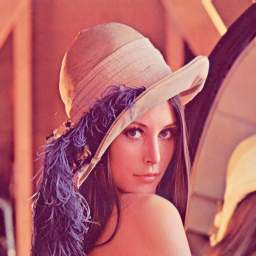

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load image
image = cv2.imread('Lena_Image.png')

# Resize using linear interpolation
resized_image_linear = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)

# Display the resized image
cv2_imshow(resized_image_linear)


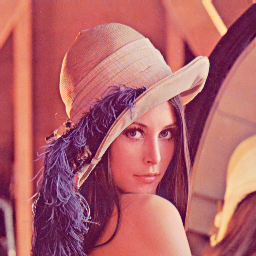

In [ ]:
# Resize using nearest neighbor interpolation
resized_image_nearest = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_NEAREST)

# Display the resized image
cv2_imshow(resized_image_nearest)


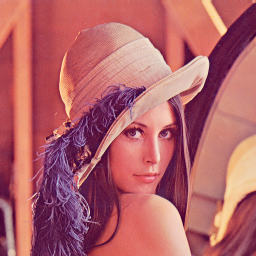

In [ ]:
# Resize using cubic interpolation
resized_image_cubic = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_CUBIC)

# Display the resized image
cv2_imshow(resized_image_cubic)


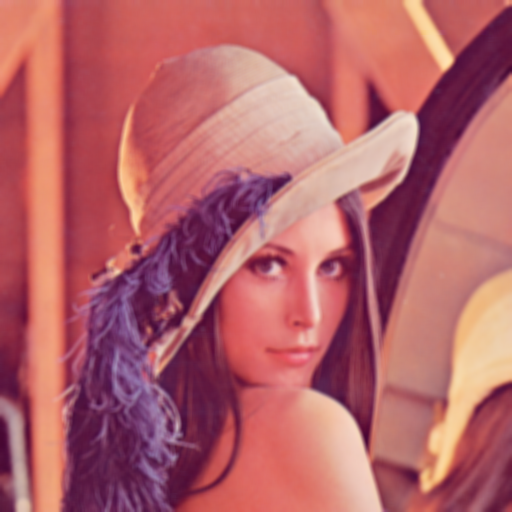

In [ ]:
# Apply box blur using a kernel size of (5, 5)
blurred_image_box = cv2.blur(image, (5, 5))

# Display the blurred image
cv2_imshow(blurred_image_box)


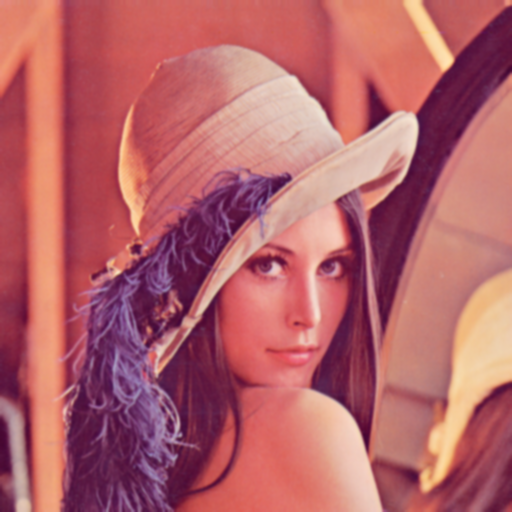

In [ ]:
# Apply Gaussian blur with kernel size (5, 5) and standard deviation of 0
blurred_image_gaussian = cv2.GaussianBlur(image, (5, 5), 0)

# Display the blurred image
cv2_imshow(blurred_image_gaussian)


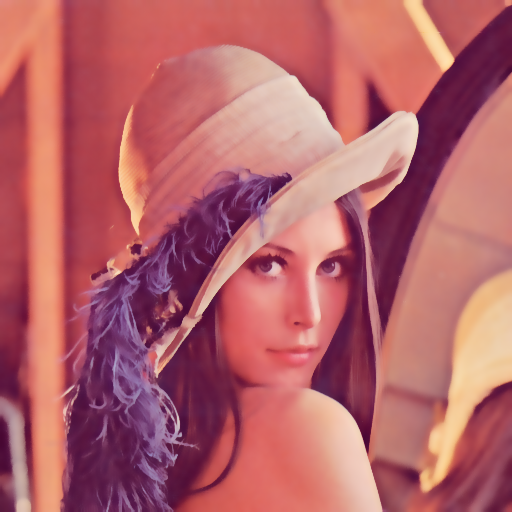

In [ ]:
# Apply adaptive (bilateral) blur
blurred_image_adaptive = cv2.bilateralFilter(image, 9, 75, 75)

# Display the blurred image
cv2_imshow(blurred_image_adaptive)


Task-2: - Apply Machine Learning Algorithm and find the model accuracy based on K
fold Cross Validation with (80-20 train-test split).  

In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
# Load the MNIST dataset
digits = load_digits()
X = digits.data
y = digits.target

X = X / 255.0

=X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def calculate_metrics(y_true, y_pred, average='weighted'):
    metrics = {}
    metrics['Accuracy'] = accuracy_score(y_true, y_pred)
    metrics['Precision'] = precision_score(y_true, y_pred, average=average)
    metrics['Recall'] = recall_score(y_true, y_pred, average=average)
    metrics['F1-Score'] = f1_score(y_true, y_pred, average=average)
    metrics['Confusion Matrix'] = confusion_matrix(y_true, y_pred)
    return metrics

 def print_metrics(metrics):
    for metric, value in metrics.items():
        print(f"{metric}:")
        print(value if metric == 'Confusion Matrix' else f"{value:.4f}")
        print()

In [ ]:
# ================================================
# 1. Naive Bayes Algorithm
# ================================================

# Initializing the Gaussian Naive Bayes model
gnb = GaussianNB()

# Fitting the model on training data
gnb.fit(X_train, y_train)

# Predicting on the test set
y_pred_gnb = gnb.predict(X_test)

# Calculating metrics for Naive Bayes
print("Metrics for Naive Bayes:")
metrics_gnb = calculate_metrics(y_test, y_pred_gnb)
print_metrics(metrics_gnb)

Metrics for Naive Bayes:
Accuracy:
0.8472

Precision:
0.8751

Recall:
0.8472

F1-Score:
0.8490

Confusion Matrix:
[[31  0  0  0  0  1  0  1  0  0]
 [ 0 24  0  0  0  0  0  0  3  1]
 [ 0  2 20  0  0  0  1  0 10  0]
 [ 0  0  1 29  0  1  0  0  3  0]
 [ 0  0  0  0 38  0  1  7  0  0]
 [ 0  0  0  1  0 44  1  1  0  0]
 [ 0  0  0  0  1  0 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  2  0  0  0  0  0  2 26  0]
 [ 0  1  1  2  0  2  0  4  4 26]]



In [ ]:
# ================================================
# 2. Artificial Neural Networks (ANN)
# ================================================

# One-hot encoding the labels for ANN
y_train_oh = to_categorical(y_train, num_classes=10)
y_test_oh = to_categorical(y_test, num_classes=10)

# Building the ANN model
ann_model = Sequential([
    Flatten(input_shape=(64,)),  # Correct input shape for 8x8 images
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each class)
])

# Compiling the model
ann_model.compile(optimizer='adam',  # Adaptive Moment Estimation optimizer
                  loss='categorical_crossentropy',  # Loss function for multi-class classification
                  metrics=['accuracy'])

# Training the model
history = ann_model.fit(X_train, y_train_oh, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2306 - loss: 2.2897
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5790 - loss: 2.2174
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7033 - loss: 2.1115
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7510 - loss: 1.9580
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7904 - loss: 1.7763
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7855 - loss: 1.5724
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8378 - loss: 1.3745
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8271 - loss: 1.1985
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8599 - loss: 1.0482
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8810 - loss: 0.9280


In [ ]:
# Evaluating the model on the test set
test_loss, test_accuracy = ann_model.evaluate(X_test, y_test_oh)
print(f"\nANN Test Accuracy: {test_accuracy:.4f}")

# Predicting on the test set
y_pred_ann = ann_model.predict(X_test)
y_pred_ann_classes = np.argmax(y_pred_ann, axis=1)  # Converting probabilities to class labels

# Calculating metrics for ANN
print("\nMetrics for Artificial Neural Network (ANN):")
metrics_ann = calculate_metrics(y_test, y_pred_ann_classes)
print_metrics(metrics_ann)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8863 - loss: 0.8116  

ANN Test Accuracy: 0.8722
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Metrics for Artificial Neural Network (ANN):
Accuracy:
0.8722

Precision:
0.8801

Recall:
0.8722

F1-Score:
0.8719

Confusion Matrix:
[[32  0  0  0  1  0  0  0  0  0]
 [ 0 22  4  0  0  0  0  0  0  2]
 [ 0  2 30  0  0  0  0  0  1  0]
 [ 0  0  1 31  0  0  0  1  0  1]
 [ 0  2  0  0 44  0  0  0  0  0]
 [ 0  0  0  1  0 39  1  0  0  6]
 [ 1  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  6  0  1  0  1  0  1 19  2]
 [ 0  0  0  4  0  1  0  5  0 30]]



ROC AUC Score (ANN): 0.9889


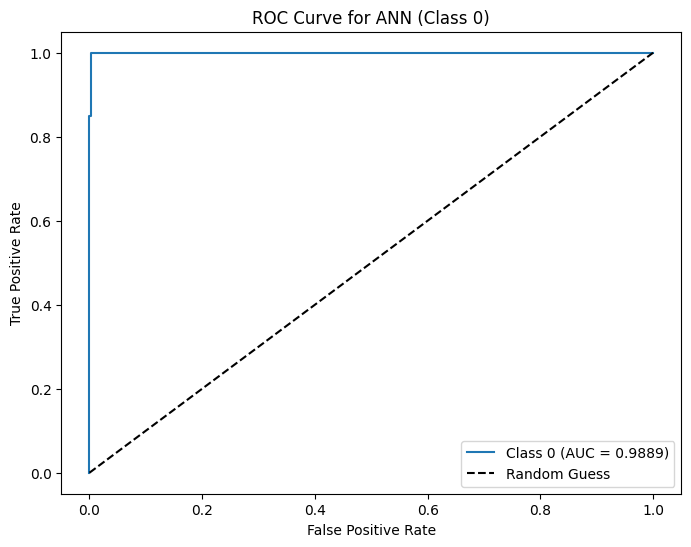

In [ ]:
# ================================================
# ROC and AUC Calculation (for ANN)
# ================================================

# ROC curve and AUC for one class (e.g., class 0)
fpr, tpr, _ = roc_curve(y_test_oh[:, 0], y_pred_ann[:, 0])
roc_auc = roc_auc_score(y_test_oh, y_pred_ann, multi_class='ovr')

print(f"ROC AUC Score (ANN): {roc_auc:.4f}")

# Plotting the ROC curve for class 0
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Class 0 (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve for ANN (Class 0)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()
